Copyright 2021 The iStructure Authors.

<h1 style="text-align:center;"><strong>Generic types of Cross Sections</strong></h1>

## __Introduction__

iStructure use the <a href="">sectionproperties</a> library to calculate the properties of cross sections. In this chapter, you will learn:

* How to define generic types of cross sections. Among them: rectangular hollow section, I-section, parallel flange channel (PFC) section and cee section.
* How to mesh geometries.
* How to uses the calculation method to predict the geometric properties.
* How to get the results ready tu use them in the design stage.


In [19]:
#Libraries
%matplotlib inline
from sectionproperties.pre.pre import Material
import sectionproperties.pre.sections as sections
from iStructure.CrossSection.MechProp import CrossSection 

## __1. Geometry - mesh__

The first step is to define the geometry of the cross section. 

### 1.1. Rectangular Hollow Section

It is defined by the `Rhs` class. Constructs a rectangular hollow section centered at ($b/2$, $d/2$).

Attributes:

* d $\rightarrow$ defines the height of the section.
* b $\rightarrow$ represents the width.
* t $\rightarrow$ consists of the thickness of the section.
* r_out $\rightarrow$ is the outer radius.
* n_r $\rightarrow$ is the number of points which represents the radius.

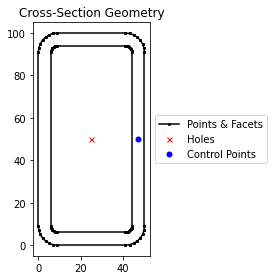

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Cross-Section Geometry'}>)

In [3]:
rectHollow = sections.Rhs(d=100, b=50, t=6, r_out=9, n_r=8)
rectHollow.plot_geometry()

The mesh is developed thanks to the <a href="">meshpy</a> library. To mesh the geometry, you will only need to use the `create_mesh` method and specify the elements size.

In [4]:
mesh = rectHollow.create_mesh(mesh_sizes=[3.0])

To show the meshed geometry, you will need to construct the cross section with: geometry, mesh and base material.

In [17]:
steel = Material(name='Steel', elastic_modulus=200e3, poissons_ratio=0.3, yield_strength=250)
hollowSection = CrossSection(rectHollow, mesh, [steel])
hollowSection.display_mesh_info()

Mesh Statistics:
--2057 nodes
--907 elements
--1 region



Now, you can display the geometry with the mesh as follows:

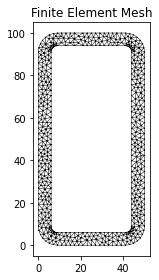

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Finite Element Mesh'}>)

In [8]:
hollowSection.plot_mesh()

### 1.2. I-section



## __2. Calculation methods__

For geomtric properties prediction, we will use the methods `calculate_geometric_properties`, `calculate_warping_properties` and `calculate_plastic_properties`. For our example, we will use the <code>hollowSection</code>.

In [18]:
#Section properties
hollowSection.calculate_geometric_properties()
hollowSection.calculate_warping_properties()
hollowSection.calculate_plastic_properties()
hollowSection.display_results()

Section Properties:
A	 = 1.592301e+03
Perim.	 = 2.844301e+02
E.A	 = 3.184602e+08
E.Qx	 = 1.592301e+10
E.Qy	 = 7.961506e+09
cx	 = 2.500000e+01
cy	 = 5.000000e+01
E.Ixx_g	 = 1.167875e+12
E.Iyy_g	 = 3.198333e+11
E.Ixy_g	 = 3.980753e+11
E.Ixx_c	 = 3.717241e+11
E.Iyy_c	 = 1.207956e+11
E.Ixy_c	 = 3.051758e-04
E.Zxx+	 = 7.434482e+09
E.Zxx-	 = 7.434482e+09
E.Zyy+	 = 4.831826e+09
E.Zyy-	 = 4.831826e+09
rx	 = 3.416511e+01
ry	 = 1.947592e+01
phi	 = 0.000000e+00
E.I11_c	 = 3.717241e+11
E.I22_c	 = 1.207956e+11
E.Z11+	 = 7.434482e+09
E.Z11-	 = 7.434482e+09
E.Z22+	 = 4.831826e+09
E.Z22-	 = 4.831826e+09
r11	 = 3.416511e+01
r22	 = 1.947592e+01
G.J	 = 1.190963e+11
G.Iw	 = 6.375230e+12
x_se	 = 2.499998e+01
y_se	 = 5.000034e+01
x_st	 = 2.499998e+01
y_st	 = 5.000034e+01
x1_se	 = -1.545789e-05
y2_se	 = 3.369765e-04
A_sx	 = 3.611216e+02
A_sy	 = 1.048735e+03
A_s11	 = 3.611216e+02
A_s22	 = 1.048735e+03
betax+	 = 6.739531e-04
betax-	 = -6.739531e-04
betay+	 = -3.091578e-05
betay-	 = 3.091578e-05
beta11+	 = 6.73